# News Headlines Sentiment

### Coded by Connor Crawford

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
#Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
bitcoin_headlines['totalResults']

6595

In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
ethereum_headlines['totalResults']

1439

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'Compound' : compound,
            'Negative' : neg,
            'Neutral'  : neu,
            'Positive' : pos,
            'Text'     : text
        })
    
    except AttributeError:
        pass
    
#turn into dataframe
bitcoin_sent_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_sent_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...
1,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...
2,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the..."
3,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...
4,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            'Compound' : compound,
            'Negative' : neg,
            'Neutral'  : neu,
            'Positive' : pos,
            'Text'     : text
        })
    
    except AttributeError:
        pass
    
#turn into dataframe
ethereum_sent_df = pd.DataFrame(ethereum_sentiments)

ethereum_sent_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...
1,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...
2,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...
3,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...
4,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_sent_df.describe()

,Compound,Negative,Neutral,Positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.082863,0.019543,0.939138,0.041330
std,0.317167,0.039270,0.076196,0.062456
min,-0.612400,0.000000,0.675000,0.000000
25%,0.000000,0.000000,0.900250,0.000000
50%,0.000000,0.000000,0.958000,0.000000
75%,0.323300,0.000000,1.000000,0.072000
max,0.817300,0.176000,1.000000,0.233000


In [10]:
# Describe the Ethereum Sentiment
ethereum_sent_df.describe()

,Compound,Negative,Neutral,Positive
count,86.000000,86.000000,86.000000,86.000000
mean,0.161636,0.020721,0.919419,0.059872
std,0.347829,0.041619,0.084913,0.071674
min,-0.700300,0.000000,0.688000,0.000000
25%,0.000000,0.000000,0.865250,0.000000
50%,0.000000,0.000000,0.935500,0.038000
75%,0.440400,0.028500,1.000000,0.105500
max,0.839900,0.189000,1.000000,0.263000


### Questions:

Q: Which coin had the highest mean positive score?

### A: Ethereum had the highest mean positive score with a mean of 0.063. Bitcoin's mean positive score was 0.042.

Q: Which coin had the highest compound score?

### A: Ethereum had the highest compound score with 0.84. Bitcoin's highest compound score was 0.82.

Q. Which coin had the highest positive score?

### A: Ethereum had the highest positive score with 0.26. Bitcoin's highest positive score was 0.23.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
stop = stopwords.words('english')
stop.append('``')
stop.append('\'')
stop.append('...')
stop.append('file')
stop.append('photo')
stop.append('chars')
stop.append('staff')
stop.append('reuters')
stop = set(stop)

In [13]:
# Complete the tokenizer function
wnl = WordNetLemmatizer()
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


In [14]:
# Create a new tokens column for bitcoin
bitcoin_sent_df['tokens'] = bitcoin_sent_df.Text.apply(tokenizer)
bitcoin_sent_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...,"[government, India, considering, 18, tax, bitc..."
1,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...,"[week, shattered, yearslong, aspiration, reach..."
2,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the...","[Mt, Gox, went, bankrupt, 2014, world, ’, larg..."
3,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...,"[Ban, reflects, Twitters, failure, promote, he..."
4,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...,"[New, York, CNN, Business, Bitcoin, flirting, ..."


In [15]:
# Create a new tokens column for ethereum
ethereum_sent_df['tokens'] = ethereum_sent_df.Text.apply(tokenizer)
ethereum_sent_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...,"[Cryptocurrencies, stole, headline, first, sto..."
1,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...,"[Ethereum, creator, Vitalik, Buterin, 14, 11, ..."
2,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...,"[Bitcoin, fizzled, Monday, trading, famously, ..."
3,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,"[representation, virtual, currency, bitcoin, s..."
4,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,"[representation, virtual, currency, bitcoin, s..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_sent_df.Text.str.cat()), N)
Counter(grams).most_common(10)

[(('virtual', 'currency'), 30),
 (('illustration', 'taken'), 28),
 (('2020', 'REUTERS/Dado'), 25),
 (('currency', 'Bitcoin'), 24),
 (('representation', 'virtual'), 20),
 (('Bitcoin', 'seen'), 18),
 (('taken', 'November'), 17),
 (('November', '19'), 17),
 (('19', '2020'), 17),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 13)]

In [18]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_sent_df.Text.str.cat()), N)
Counter(grams).most_common(10)

[(('virtual', 'currency'), 14),
 (('illustration', 'taken'), 13),
 (('2020', 'REUTERS/Dado'), 11),
 (('currency', 'Bitcoin'), 8),
 (('representation', 'virtual'), 7),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 6),
 (('Representations', 'virtual'), 6),
 (('digital', 'currency'), 6),
 (('currency', 'bitcoin'), 5),
 (('bitcoin', 'seen'), 5)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
bitcoin_tokens = tokenizer(bitcoin_sent_df.Text.str.cat())
token_count(bitcoin_tokens)

[('Bitcoin', 64),
 ('currency', 45),
 ('taken', 34),
 ('2020', 32),
 ('virtual', 31),
 ('illustration', 28),
 ('REUTERS/Dado', 27),
 ('seen', 26),
 ('bitcoin', 22),
 ('representation', 20)]

In [21]:
# Get the top 10 words for Ethereum
ethereum_tokens = tokenizer(ethereum_sent_df.Text.str.cat())
token_count(ethereum_tokens)

[('Bitcoin', 28),
 ('bitcoin', 24),
 ('currency', 23),
 ('Ethereum', 22),
 ('cryptocurrency', 21),
 ('2020', 21),
 ('taken', 18),
 ('…', 17),
 ('price', 17),
 ('virtual', 15)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
#Define wordcloud function
def wordcloud(text, title=''):
    df_cloud = WordCloud(width=500).generate(text)
    plt.imshow(df_cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

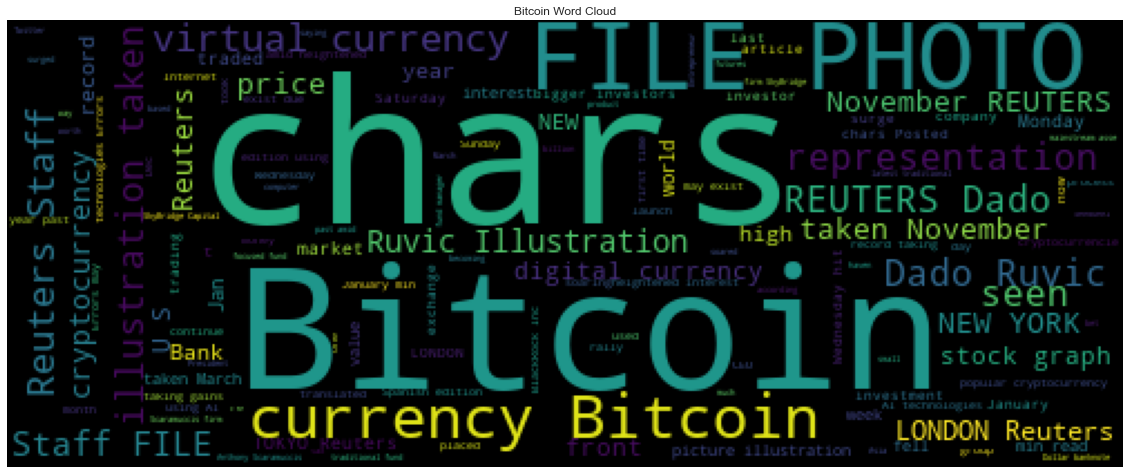

In [24]:
# Generate the Bitcoin word cloud
wordcloud(bitcoin_sent_df.Text.str.cat(), title = 'Bitcoin Word Cloud')

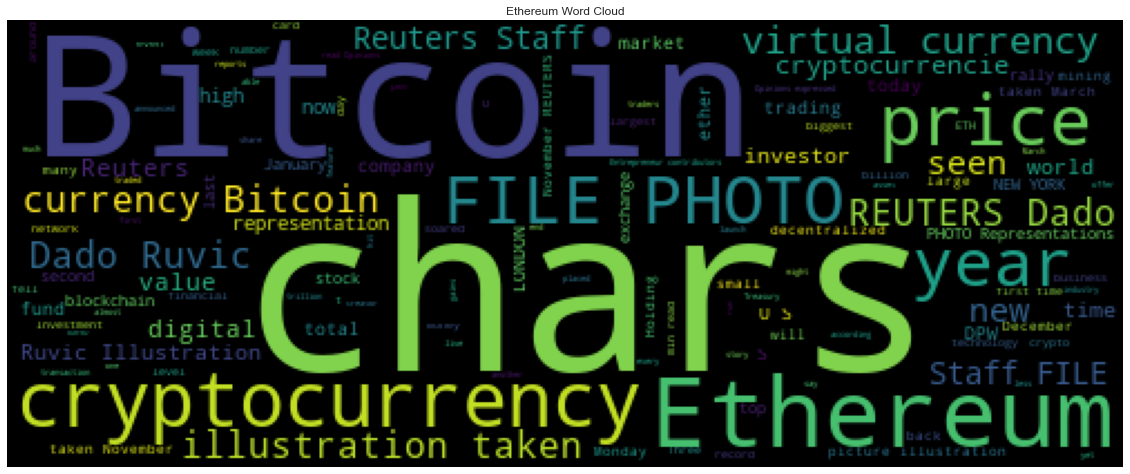

In [25]:
# Generate the Ethereum word cloud
wordcloud(ethereum_sent_df.Text.str.cat(), title = 'Ethereum Word Cloud')

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
all_bitcoin_text = bitcoin_sent_df.Text.str.cat()
#all_bitcoin_text

In [30]:
# Run the NER processor on all of the text
doc = nlp(all_bitcoin_text)


# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [31]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [32]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

India GPE
18% PERCENT
bitcoin GPE
the Times of India ORG
20,000 MONEY
Bitcoin GPE
Saturday DATE
33,000 MONEY
CoinDesk PERSON
Mt. Gox PERSON
2014 DATE
Bitcoin GPE
850,000 CARDINAL
Bitcoins PERSON
thousands CARDINAL
Twitters NORP
Hannah McKay-Pool/Getty PERSON
Twitter ORG
Jack Dorsey PERSON
Tweets GPE
US GPE
Don PERSON
CNN ORG
$30,000 mark MONEY
weeks DATE
Saturday DATE
above $33,000 MONEY
Gemini PERSON
Blockrize WORK_OF_ART
today DATE
Blockrizes GPE
Later this year DATE
Joe Bidens PERSON
the U.S. Treasury Department ORG
Michael S. Barr PERSON
bitcoin GPE
the popular cryptocurrency exchange ORG
Sunday DATE
Bitcoin GPE
50% PERCENT
the previous month DATE
the week DATE
24.8% PERCENT
Bitcoin GPE
12th ORDINAL
Forbes ORG
Reuters ORG
LONDON GPE
Dec 30 DATE
Reuters ORG
Bitcoin GPE
Wednesday DATE
a record $28,599.99 MONEY
this year DATE
295% PERCENT
3.5% PERCENT
28,349 MONEY
Alex Castro PERSON
The Verge ORG
Jack Dorsey PERSON
Twitter and Square ORG
Reuters ORG
LONDON GPE
Jan 4 DATE
Reuters ORG
B

---

## Ethereum NER

In [33]:
# Concatenate all of the ethereum text together
all_ethereum_text = ethereum_sent_df.Text.str.cat()


In [34]:
# Run the NER processor on all of the text
doc = nlp(all_ethereum_text)

# Add a title to the document
doc.user_data['title'] = 'Ethereum NER'

In [35]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [36]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
2020 DATE
Las Vegas GPE
dozens CARDINAL
3080 CARDINAL
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
second ORDINAL
December 2020 DATE
first ORDINAL
Ethereum 2.0 ORG
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
Reuters ORG
Bitcoin GPE
Wednesday DATE
a record $28,599.99 MONEY
digital ORG
this year DATE
YORK PERSON
Reuters ORG
U.S. GPE
the years DATE
U.S. GPE
chars]1 CARDINAL
1 CARDINAL
more than $1 